# Лабораторная работа 6. Кластеризация

# Задание

1. Сформировать 3 различных датасета для кластеризации с помощью функции make_blobs (количество кластеров должно быть различным, размерность всех датасетов должна быть 2 - чтобы можно было визуализировать).
2. Для каждого датасета:
- визуализировать датасет
- выполнить кластеризацию с помощью алгоритма KMeans
- визуализировать центроид + цветом обозначить принадлежность точки кластеру
- подобрать оптимальное количество кластеров по значению суммы квадратов расстояний до центроидов
- подобрать оптимальное количество кластеров по значению коэффициента силуета
- выполнить кластеризацию с помощью DBSCAN тремя способами (самостоятельно задать или подобрать 3 пары параметров для этого алгоритма)
3. Самостоятельно реализовать KMeans с возможностью подсчета суммы квадратов расстояний до центроидов.
4. Провести кластеризацию всех датасетов с использованием собственной реализации Kmeans.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Создание датасетов с помощью make_blobs и визуализация

make_blobs - генерирует фиктивные данные

n_samples - количество точек, поровну разделенных между кластерами (по умолчанию 100)

n_features - размерность признакового пространства (количество признаков) (по умолчанию 2)

centers - количество кластеров ( по умолчанию 3)

Получим кортеж Python, где первый элемент - массив numpy с n_samples наблюдениями. Каждое наблюдение содержит n_features признаков. Второй элемент -  массив numpy, который содержит индекс кластера, которому принадлежит каждое наблюдение.

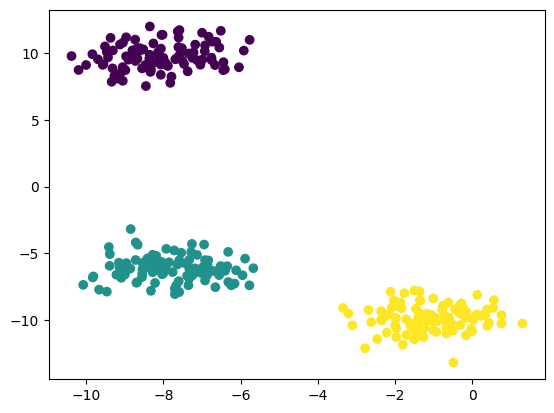

In [2]:
#датасет из 300 точек, в 2-мерном пространстве, 3 кластера
data1 = make_blobs(n_samples=300, n_features=2, centers=3)
plt.scatter(data1[0][:,0], data1[0][:,1], c=data1[1]);

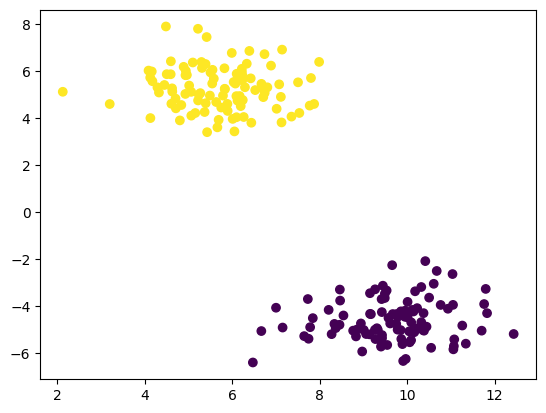

In [4]:
#датасет из 200 точек, в 2-мерном пространстве, 2 кластера
data2 = make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(data2[0][:,0], data2[0][:,1], c=data2[1]);

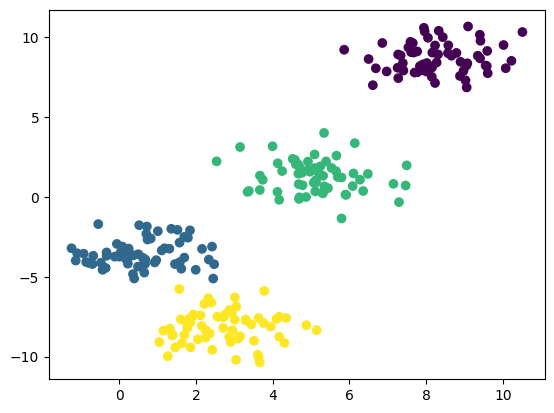

In [5]:
#датасет из 250 точек, в 2-мерном пространстве, 4 кластера
data3 = make_blobs(n_samples=250, n_features=2, centers=4)
plt.scatter(data3[0][:,0], data3[0][:,1], c=data3[1]);

## Кластеризация с помощью алгоритма KMeans

KMeans - классический и наиболее простой алгоритм кластеризации без учителя. В процессе построения модели не нужно разбивать набор данных на обучающую и тестовую выборки.

### Идея метода

0. Случайно выставляем точки в N-мерном пространстве в допустимой области, где `N` - число признаков в данных. Число признаков можно найти как `df.shape[1]`. Данные точки будут центрами кластеров (<b>центроидами</b>) `0..N-1`. Присваиваем число итераций, равное нулю `n_iter = 0`.
1. Кластеризуем точки. На данном шаге вычисляются все попарные расстояния между центрами кластеров `center` и точками `P` в датасете. Функция расстояния - Евклидова (корень из суммы квадратов) $\sqrt{\sum_{i=1}^N{(center_i-P_i)^2}}$. Для каждой точки в датасете присваивается номер кластера, к которому она принадлежит - класс ближайшей из точек `center`.
2. Если на данном этапе количество итераций больше либо равно максимальному числу итераций `n_iter >= max_iter`, возвращаем результат кластеризации (то есть наши предсказания классов), иначе повышаем `n_iter += 1`.
3. Пересчитываем центры кластеров. Для каждой координаты высчитываем взвешенную сумму координат тех точек, которые попали в данный кластер. **НЕ нужно пользоваться евклидовой метрикой на данном шаге.** Мы берем среднее для каждой из координат среди всех тех точек, которые попали в кластер `i`: $center_i = mean(P\in i)$. Если для всех центров кластеров их координаты изменились незначительно, прерываем вычисления (алгоритм сошелся), возвращаем результат. Иначе переходим к шагу 1.

In [6]:
from sklearn.cluster import KMeans

### Обучаем модели

n_clusters - количество кластеров, которые нужно сформировать, а также количество центроидов, которые нужно сгенерировать.

n_init - сколько раз алгоритм запускается с разными начальными значениями центроидов. Окончательные результаты — это лучший результат n_init последовательных прогонов с точки зрения инерции.
При n_init='auto', количество прогонов зависит от значения init: 10 при использовании init='random', 1 при использовании init='k-means++'.
По умолчанию задано init='k-means++'.


в метод fit передаем первый элемент кортежа - массив с наблюдениями(точками)

In [7]:
kmeans_model1 = KMeans(n_clusters=3, n_init='auto').fit(data1[0]) 

In [8]:
#получаем координаты центроидов(где находится центр каждого кластера)
kmeans_model1.cluster_centers_ 

array([[-1.07958036, -9.84798288],
       [-8.1356423 ,  9.71814859],
       [-7.76926741, -6.16829929]])

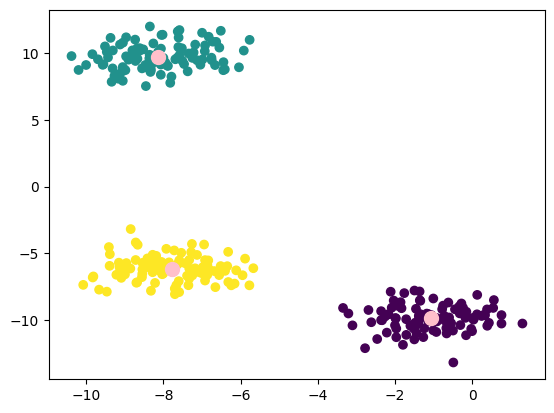

In [9]:
# отрисовываем на плоскости точки, цветом обозначаем кластер
plt.scatter(data1[0][:,0], data1[0][:,1], c=kmeans_model1.labels_)
# отрисовываем центроиды
plt.scatter(kmeans_model1.cluster_centers_[:,0], kmeans_model1.cluster_centers_[:,1], s=100, c='pink')

In [10]:
kmeans_model2 = KMeans(n_clusters=2, n_init='auto').fit(data2[0])

In [11]:
kmeans_model2.cluster_centers_ 

array([[ 9.66028725, -4.598666  ],
       [ 5.69946971,  5.27656597]])

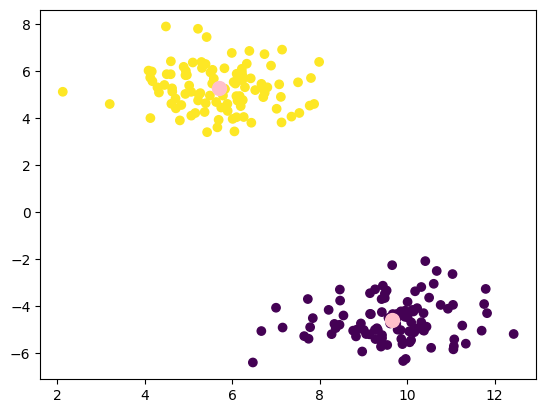

In [12]:
# отрисовываем на плоскости точки, цветом обозначаем кластер
plt.scatter(data2[0][:,0], data2[0][:,1], c=kmeans_model2.labels_)
# отрисовываем центроиды
plt.scatter(kmeans_model2.cluster_centers_[:,0], kmeans_model2.cluster_centers_[:,1], s=100, c='pink')

In [13]:
kmeans_model3 = KMeans(n_clusters=4, n_init='auto').fit(data3[0])

In [14]:
kmeans_model3.cluster_centers_ 

array([[ 0.59741901, -3.59129336],
       [ 8.2876113 ,  8.66915757],
       [ 5.10001868,  1.22473044],
       [ 2.71075974, -8.19462324]])

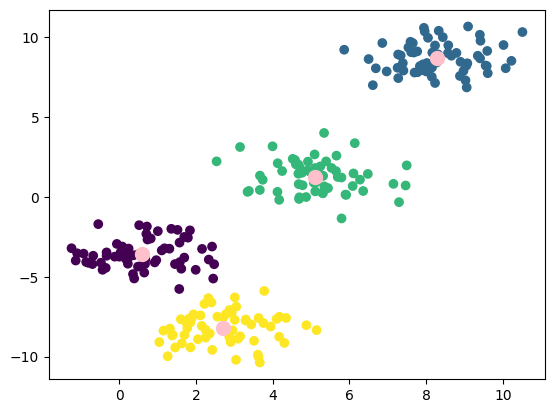

In [15]:
# отрисовываем на плоскости точки, цветом обозначаем кластер
plt.scatter(data3[0][:,0], data3[0][:,1], c=kmeans_model3.labels_)
# отрисовываем центроиды
plt.scatter(kmeans_model3.cluster_centers_[:,0], kmeans_model3.cluster_centers_[:,1], s=100, c='pink')

## Подбор оптимального количества кластеров

Определим сумму квадратов расстояний для всех точек до ближайших к ним центроидов

С увеличением количества кластеров эта сумма будет уменьшаться, однако в определенный момент (оптимальное количество кластеров), она начнет уменьшаться слишком медлено

In [16]:
kmeans_model1.inertia_

566.2798449110599

In [17]:
kmeans_model2.inertia_

394.7191634186158

In [18]:
kmeans_model3.inertia_

460.59179024780883

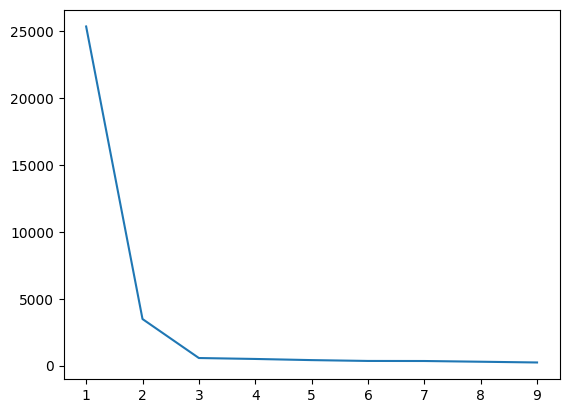

In [19]:
inertias = []

for i in range(1, 10):
    inertias.append(KMeans(i, n_init="auto").fit(data1[0]).inertia_)
    
plt.plot(range(1, 10), inertias);

Видим, что оптимальное количество кластеров для data1 - 3.

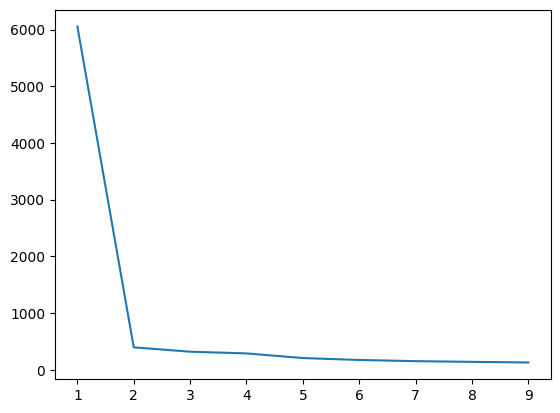

In [20]:
inertias = []

for i in range(1, 10):
    inertias.append(KMeans(i, n_init="auto").fit(data2[0]).inertia_)
    
plt.plot(range(1, 10), inertias);

Видим, что оптимальное количество кластеров для data2 - 2.

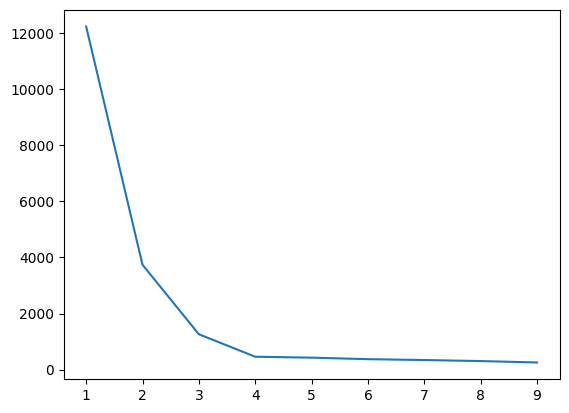

In [21]:
inertias = []

for i in range(1, 10):
    inertias.append(KMeans(i, n_init="auto").fit(data3[0]).inertia_)
    
plt.plot(range(1, 10), inertias);

Видим, что оптимальное количество кластеров для data3 - 4.

После точки х = 3 значение начиет уменьшаться с меньшей скоростью. Это локтевая точка, метод подбора оптимального количества кластеров - методом локтя.

## Подбор оптимального количества кластеров по значению коэффициента силуета

Метрика inertia_ существует только тогда, когда у нас есть центроиды. Не все алгоритмы кластеризации предполагают поиск оптимального расположения центроидов, в таком случае используются внешние(когда данные размечены и мы знаем правильные ответы, можем сравнить их с результатами кластеризации) и внутренние(когда мы не знаем правильных ответов) метрики.

Наиболее часто используемая внутренняя метрика - коэффициент силуета (silhouette score). Ее значение находится в диапазоне [-1, 1]. Значения > 0 обычно считаются хорошими.

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(data1[0], kmeans_model1.labels_)

0.8127410373681901

In [24]:
silhouette_score(data2[0], kmeans_model2.labels_)

0.8350767324639756

In [25]:
silhouette_score(data3[0], kmeans_model3.labels_)

0.708796167992579

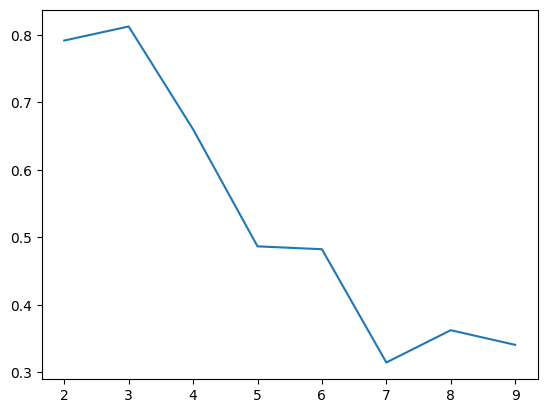

In [26]:
silhouettes = []

for i in range(2, 10):
    silhouettes.append(silhouette_score(data1[0], KMeans(i, n_init="auto").fit(data1[0]).labels_))
    
plt.plot(range(2, 10), silhouettes);

Видим, что оптимальное количество кластеров для data1 - 3.

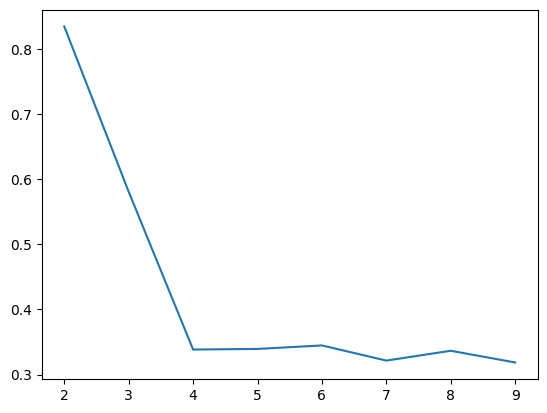

In [27]:
silhouettes = []

for i in range(2, 10):
    silhouettes.append(silhouette_score(data2[0], KMeans(i, n_init="auto").fit(data2[0]).labels_))
    
plt.plot(range(2, 10), silhouettes);

Видим, что оптимальное количество кластеров для data2 - 2.

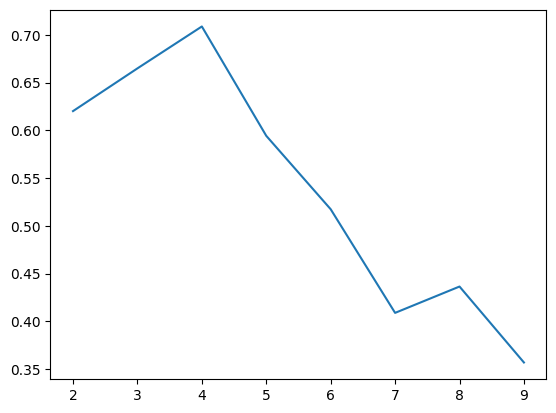

In [28]:
silhouettes = []

for i in range(2, 10):
    silhouettes.append(silhouette_score(data3[0], KMeans(i, n_init="auto").fit(data3[0]).labels_))
    
plt.plot(range(2, 10), silhouettes);

Видим, что оптимальное количество кластеров для data3 - 4.

## Кластеризация с помощью DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise) - это наиболее часто используемый в настоящее время алгоритм кластеризации (вернее сказать, что это база, поскаольку наиболее часто на практике используются его модификации).

Преимущество перед KMeans в том, что он позволяет выделять кластеры произвольной формы и сам определяет количество кластеров.

Данный алгоритм предполагает, что часть точек из набора данных не принадлежат ни одному из кластеров, а являются шумом. В то же время никаких центроидов нет - кластеры формируются на основе близости.

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan1 = DBSCAN().fit(data1[0])

In [31]:
np.unique(dbscan1.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

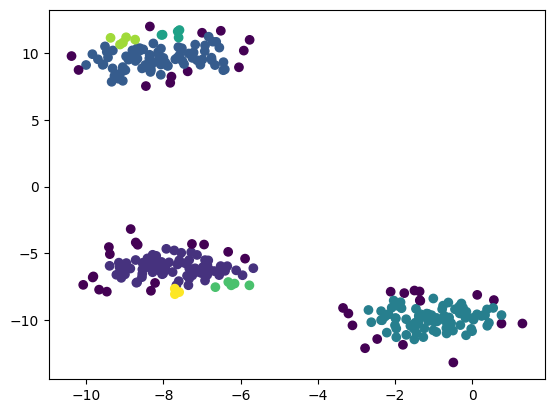

In [32]:
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan1.labels_)

In [33]:
dbscan2 = DBSCAN().fit(data2[0])

In [34]:
np.unique(dbscan2.labels_)

array([-1,  0,  1,  2], dtype=int64)

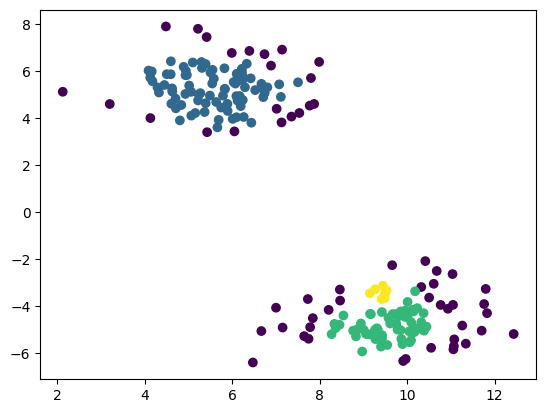

In [35]:
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan2.labels_)

In [36]:
dbscan3 = DBSCAN().fit(data3[0])

In [37]:
np.unique(dbscan3.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

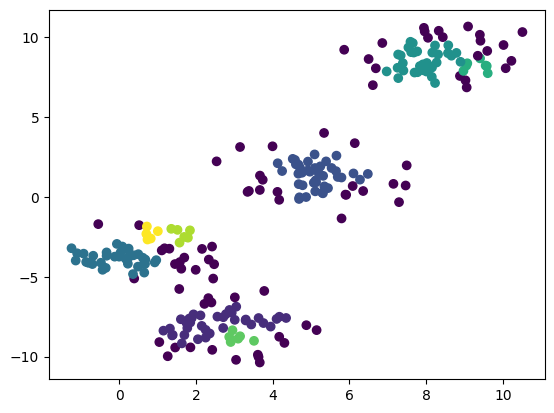

In [38]:
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan3.labels_)

Основные параметры алгоритма - эпсилон и  минимальное количество точек в окрестности (с радиусом эпсилон).

Эпсилон - размер эпсилон-окрестности (максимальное расстояние между двумя образцами, при котором один считается соседним с другим)

Минимальное количество точек в окрестности часто берут как 2 * размерность (в нашем случае - 4).

Далее для каждой точки считают расстояния до k ближайших соседей, считая за первого соседа саму точку (иногда не считают саму точку за первого соседа - как захочет исследователь). Полученные значения усредняют. 

Усредненные значения сортируют по возрастанию и отображают на графике. Локтевая точка может указать на значение эпсилон (это будет координата y).

In [39]:
from sklearn.neighbors import NearestNeighbors

In [40]:
nbrs = NearestNeighbors(n_neighbors=5).fit(data1[0])
distances, indices = nbrs.kneighbors(data1[0]) #считаем расстояние до k ближайших соседей 
distances = np.mean(distances, axis=1) #усредняем 
distances = np.sort(distances) #сортируем по возрастанию
distances

array([0.10002548, 0.10130659, 0.10807475, 0.10997528, 0.11953624,
       0.1208479 , 0.12127546, 0.12244367, 0.12466599, 0.12479375,
       0.12613264, 0.1261855 , 0.12720062, 0.12789716, 0.12807171,
       0.12853804, 0.12874582, 0.13277265, 0.13601855, 0.13744156,
       0.13799835, 0.13906777, 0.13923747, 0.13955602, 0.13988472,
       0.13996243, 0.14157312, 0.14351802, 0.14371627, 0.14580901,
       0.14606042, 0.14627457, 0.14657238, 0.14876657, 0.14938277,
       0.14985917, 0.15059501, 0.15131421, 0.15232163, 0.15270243,
       0.15343546, 0.15455041, 0.15852957, 0.15944413, 0.16081177,
       0.16123498, 0.16226177, 0.1622789 , 0.16267466, 0.16271609,
       0.16350468, 0.16469938, 0.1647284 , 0.16513733, 0.16581602,
       0.16599956, 0.16667949, 0.16759888, 0.16808125, 0.16830034,
       0.16933942, 0.16945472, 0.16948745, 0.17035194, 0.1720696 ,
       0.17290929, 0.17317154, 0.17440639, 0.17475061, 0.17480473,
       0.17520122, 0.1771004 , 0.17811687, 0.17929371, 0.18088

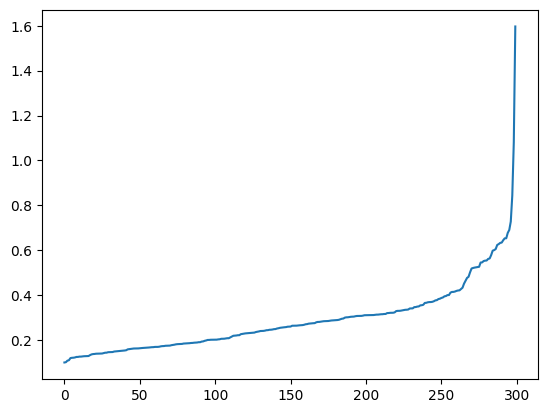

In [41]:
plt.plot(distances); #отображаем на графике

Видим, что локоть находится где-то в районе 0.8. Попробуем задать эпсилон равное 0.9

[-1  0  1  2]


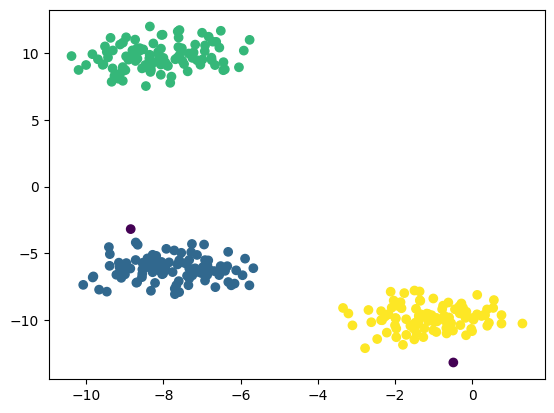

In [42]:
dbscan1 = DBSCAN(eps=0.9, min_samples=4).fit(data1[0])
print(np.unique(dbscan1.labels_))
plt.scatter(data1[0][:,0], data1[0][:,1], c=dbscan1.labels_)

In [43]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data2[0])
distances, indices = nbrs.kneighbors(data2[0])
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
distances

array([0.0638959 , 0.06597259, 0.07205828, 0.07669854, 0.07760786,
       0.08644189, 0.08803708, 0.09230986, 0.09305527, 0.09470464,
       0.09537544, 0.09559868, 0.09730538, 0.09760247, 0.09831842,
       0.10395753, 0.1075226 , 0.11074474, 0.11189954, 0.11486282,
       0.11487302, 0.11487526, 0.11574737, 0.11602998, 0.11666782,
       0.11719969, 0.11761257, 0.11789103, 0.12265724, 0.12781917,
       0.12823582, 0.12981572, 0.12994838, 0.13090316, 0.13175256,
       0.13298786, 0.13305049, 0.13325971, 0.13327545, 0.13329544,
       0.13395203, 0.13531484, 0.13901247, 0.13960318, 0.13979538,
       0.14022399, 0.14106538, 0.14106639, 0.1416343 , 0.14222259,
       0.14269265, 0.14448242, 0.1455369 , 0.14747443, 0.1482881 ,
       0.14849833, 0.14866166, 0.14939873, 0.15198853, 0.15344229,
       0.15515169, 0.15544166, 0.1558229 , 0.15783663, 0.15893515,
       0.16023556, 0.16094529, 0.16353604, 0.16511624, 0.16659671,
       0.16766395, 0.16956094, 0.17179262, 0.17240225, 0.17317

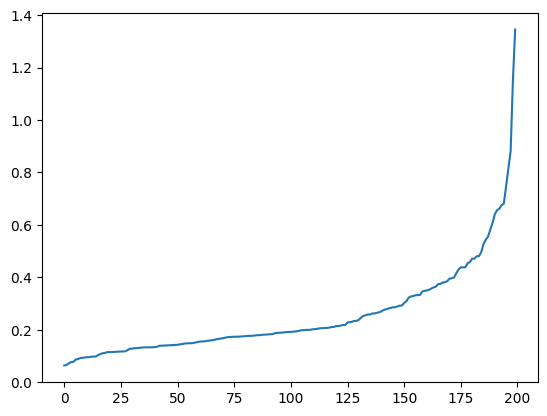

In [44]:
plt.plot(distances);

[0 1]


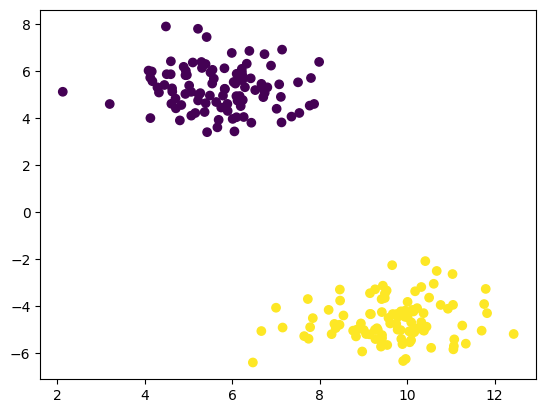

In [47]:
dbscan2 = DBSCAN(eps=1.5, min_samples=4).fit(data2[0])
print(np.unique(dbscan2.labels_))
plt.scatter(data2[0][:,0], data2[0][:,1], c=dbscan2.labels_)

In [48]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data3[0])
distances, indices = nbrs.kneighbors(data3[0])
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
distances

array([0.05193607, 0.05836339, 0.07186396, 0.07585185, 0.08176754,
       0.09180302, 0.09331995, 0.09607368, 0.09708683, 0.09725123,
       0.10215888, 0.10331209, 0.1034262 , 0.10540519, 0.11046917,
       0.1105798 , 0.11691756, 0.12044362, 0.12127216, 0.12781383,
       0.12898657, 0.1300762 , 0.13033029, 0.13227423, 0.13301582,
       0.13359883, 0.13382973, 0.13464389, 0.13515306, 0.13661923,
       0.13734297, 0.13966932, 0.1408993 , 0.14184894, 0.14271293,
       0.14321707, 0.14322518, 0.14328266, 0.14380834, 0.14392705,
       0.1453338 , 0.14967666, 0.15397185, 0.15439825, 0.15500664,
       0.15606937, 0.15686409, 0.15903881, 0.15932692, 0.15952964,
       0.16340404, 0.16343482, 0.16690271, 0.1681216 , 0.16938136,
       0.16956508, 0.17207253, 0.17510727, 0.17543015, 0.17578903,
       0.17602727, 0.17643242, 0.17882139, 0.17894673, 0.17924546,
       0.18207569, 0.18252788, 0.18302501, 0.18396031, 0.18402176,
       0.18923378, 0.19102734, 0.1915071 , 0.19518329, 0.19943

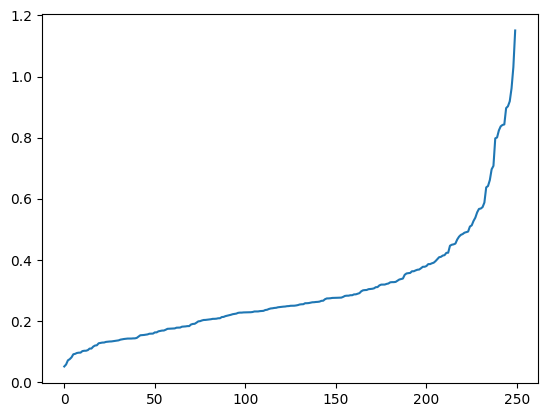

In [49]:
plt.plot(distances);

[-1  0  1  2  3]


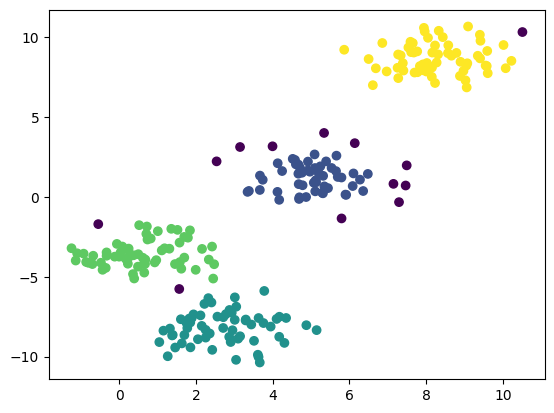

In [51]:
dbscan3 = DBSCAN(eps=0.9, min_samples=4).fit(data3[0])
print(np.unique(dbscan3.labels_))
plt.scatter(data3[0][:,0], data3[0][:,1], c=dbscan3.labels_)

## Реализация KMeans

In [52]:
class My_KMeans():
    def __init__(self, n_clusters=3, max_iters=1000):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.labels = None
        self.iters = 0
        self.inertia = None
        
    def fit(self, data):
        data_bounds = np.squeeze(np.sort(np.array([np.amax(data[0], axis=0), np.amin(data[0], axis=0)]).T)) #значения признаков
        self.centroids = []
        self.labels = np.zeros(data[0].shape[0])
        
        for i in range(self.n_clusters):
            #добавляем центроиды в пределах значений признаков
            self.centroids.append([(data_bounds[i][1] - data_bounds[i][0]) * np.random.random_sample() + data_bounds[i][0] for i in range(data[0].shape[1])])
        
        self.centroids = np.array(self.centroids)
        change = np.inf #условие выхода из алгоритма
        #среднее от разницы между предыдущими и новыми центроидами
        
        while (self.iters < self.max_iters and change > 0.5):
            prev_centroids = self.centroids.copy() #предыдущие центроиды
            dists = []
            min_dists = []
            
            for point in data[0]:
                #для каждой точки высчитываем расстояние от этой точки до каждого центроида
                dists_centroids = []
                for centroid in self.centroids:
                    dists_centroids.append(np.linalg.norm(point - centroid)) 
                dists.append(dists_centroids)#заносим расстояния в массив (размерность количесвто точек на количество кластеров)
                
            for i in range(len(dists)):
                #вычисляем метрику
                self.labels[i] = np.argmin(dists[i])
                min_dists.append(dists[i][np.argmin(dists[i])]) #argmin - индекс минимального элемента
            self.inertia = np.sum(np.square((min_dists)))
            
            for i in range(self.n_clusters):
                cluster_points = []
                for j in range(len(self.labels)):
                    if self.labels[j] == i:
                        cluster_points.append(data[0][j])#присваиваем точкам новый кластер
                self.centroids[i] = np.mean(cluster_points, axis=0)#обновляем кластер через среднее взвешенное расстояние
                
            change = np.mean(np.linalg.norm(self.centroids - prev_centroids))
            self.iters +=1

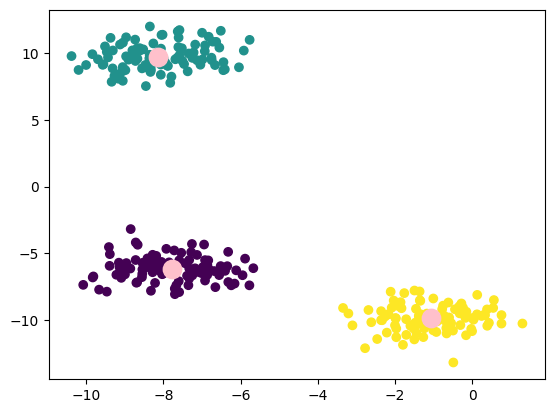

In [53]:
km1 = My_KMeans(n_clusters=3)
km1.fit(data1)
plt.scatter(data1[0][:,0], data1[0][:,1], c=km1.labels);
plt.scatter(km1.centroids[:,0], km1.centroids[:,1], s=175, c='pink');

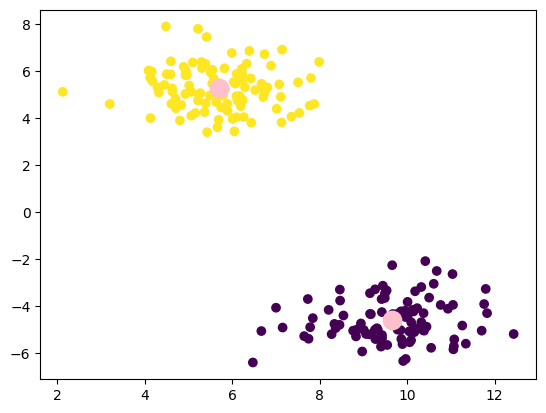

In [54]:
km2 = My_KMeans(n_clusters=2)
km2.fit(data2)
plt.scatter(data2[0][:,0], data2[0][:,1], c=km2.labels);
plt.scatter(km2.centroids[:,0], km2.centroids[:,1], s=175, c='pink');

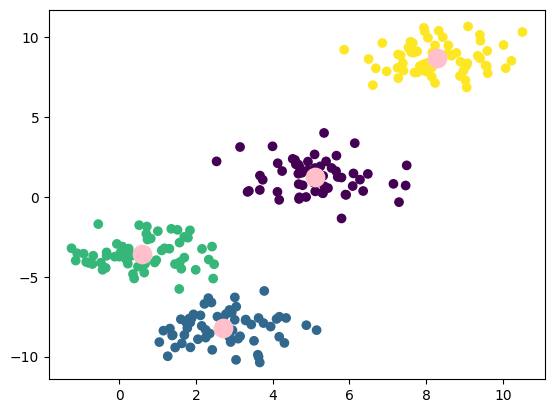

In [58]:
km3 = My_KMeans(n_clusters=4)
km3.fit(data3)
plt.scatter(data3[0][:,0], data3[0][:,1], c=km3.labels);
plt.scatter(km3.centroids[:,0], km3.centroids[:,1], s=175, c='pink');